In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import torch
import torch.utils.data
import collections

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-07,75.431427,75.842857,74.555717,74.781425,66.127869,72462600
1,2014-04-08,75.027145,75.160004,74.099998,74.777145,66.124092,60972100
2,2014-04-09,74.662857,75.784286,74.574287,75.760002,66.993195,51542400
3,2014-04-10,75.811432,76.034286,74.738571,74.782860,66.129150,59913000
4,2014-04-11,74.142860,74.690002,73.877144,74.230003,65.640236,67929400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null object
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
data.head()

,Date,Adj Close
0,2014-04-07,66.127869
1,2014-04-08,66.124092
2,2014-04-09,66.993195
3,2014-04-10,66.129150
4,2014-04-11,65.640236


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
Date         1259 non-null datetime64[ns]
Adj Close    1259 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [7]:
data = data.set_index(['Date'], drop=True)
data.head()

,Adj Close
Date,
2014-04-07,66.127869
2014-04-08,66.124092
2014-04-09,66.993195
2014-04-10,66.129150
2014-04-11,65.640236


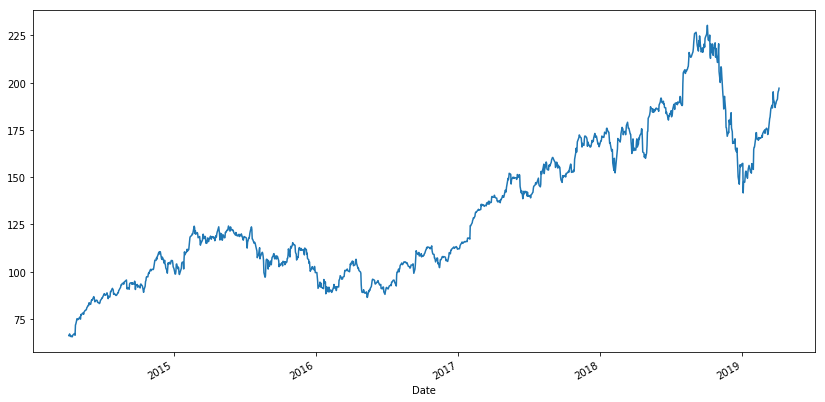

In [8]:
data['Adj Close'].plot(figsize=(14,7))

In [9]:
split_date = pd.Timestamp('2018-01-01')

data = data['Adj Close'] #converting dataframe to series
data.head()

Date
2014-04-07    66.127869
2014-04-08    66.124092
2014-04-09    66.993195
2014-04-10    66.129150
2014-04-11    65.640236
Name: Adj Close, dtype: float64

In [10]:
type(data)

pandas.core.series.Series

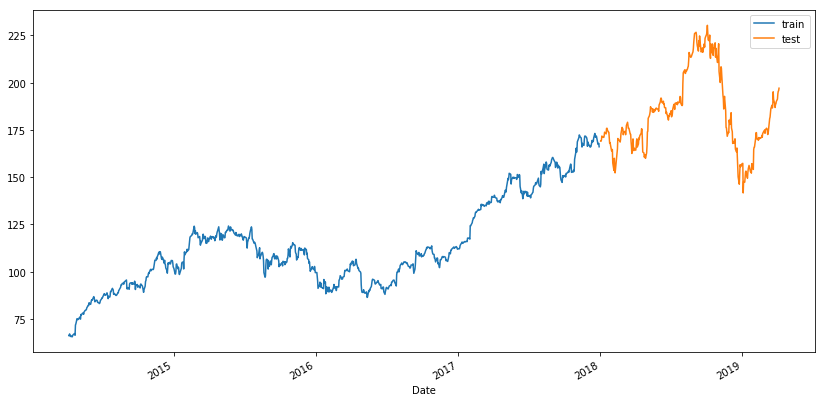

In [11]:
train = data.loc[:split_date]
test = data.loc[split_date:]

plt.figure(figsize=(14,7))

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [12]:
train.head()

Date
2014-04-07    66.127869
2014-04-08    66.124092
2014-04-09    66.993195
2014-04-10    66.129150
2014-04-11    65.640236
Name: Adj Close, dtype: float64

In [13]:
x_train = train.values.reshape(-1,1)
x_test = test.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

In [14]:
X_train = scaled_train[:-1]
y_train = scaled_train[1:]
train = torch.from_numpy(X_train)
train = train.type(torch.FloatTensor)
train_target = torch.from_numpy(y_train)
train_target = train_target.type(torch.FloatTensor)
train_tensor = torch.utils.data.TensorDataset(train, train_target)
train_loader = torch.utils.data.DataLoader(dataset = train_tensor, batch_size = 1, shuffle = True)
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [15]:
X_test = scaled_test[:-1]
y_test = scaled_test[1:]
test = torch.from_numpy(X_test)
test = train.type(torch.FloatTensor)
test_target = torch.from_numpy(y_test)
test_target = train_target.type(torch.FloatTensor)
test_tensor = torch.utils.data.TensorDataset(test, test_target)
test_loader = torch.utils.data.DataLoader(dataset = test_tensor, batch_size = 1, shuffle = False)
type(test_loader)

torch.utils.data.dataloader.DataLoader

In [16]:
print(isinstance(train_loader, collections.Iterable)) #check if the loaders are iterable
print(isinstance(test_loader, collections.Iterable))

True
True
